##Intro to KNN Regression
# KNN Regression – Real Estate Price Prediction

In this section, we use **K-Nearest Neighbors Regression (KNN Regressor)** to predict **house prices** from the *Real-estate* dataset.

**Dataset:** `Real-estate-dataset.csv`  
**Goal:** Predict the `price` column based on:

- `X1 transaction date`
- `X2 house age`
- `X3 distance to the nearest MRT station`
- `X4 number of convenience stores`
- `X5 latitude`
- `X6 longitude`

We will:
1. Load and inspect the data  
2. Prepare features (`X_reg`) and target (`y_reg`)  
3. Scale the features (important for KNN distance calculations)  
4. Train a `KNeighborsRegressor`  
5. Evaluate with RMSE and R²  
6. Visualize actual vs predicted values and residuals  

KNN Regression predicts a new price by looking at the **K most similar houses** in the dataset and averaging their prices.


In [ ]:
import pandas as pd

# Load Real Estate dataset
real_estate_df = pd.read_csv("/content/drive/MyDrive/INDE 577 github Jupyter files/Supervised Learning/Neural Network/Real-estate-dataset.csv")

print(real_estate_df.head())
print(real_estate_df.info())


   price  No  X1 transaction date  X2 house age  \
0   37.9   1             2012.917          32.0   
1   42.2   2             2012.917          19.5   
2   47.3   3             2013.583          13.3   
3   54.8   4             2013.500          13.3   
4   43.1   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  
0     24.98298     121.54024  
1     24.98034     121.53951  
2     24.98746     121.54391  
3     24.98746     121.54391  
4     24.97937     121.54245  
<class 'pandas.core.frame.DataFrame'>


##Prepare Features and Target (Regression)

We drop the `No` column (index-like, not useful for prediction).

- **Target (`y_reg`)**: `price`
- **Features (`X_reg`)**: all other columns except `No` and `price`


In [ ]:
# Drop index-like column
real_estate_df = real_estate_df.drop(columns=["No"])

# Target and features
y_reg = real_estate_df["price"]
X_reg = real_estate_df.drop(columns=["price"])

print("Features shape:", X_reg.shape)
print("Target shape:", y_reg.shape)
X_reg.head()


Features shape: (414, 6)
Target shape: (414,)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


## Train/Test Split + Scaling (Regression)

We split the dataset into **training** and **test** sets, then scale the features using `StandardScaler`.

KNN uses distance (e.g., Euclidean), so scaling is important to ensure that all features contribute fairly.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features
reg_scaler = StandardScaler()
X_reg_train_scaled = reg_scaler.fit_transform(X_reg_train)
X_reg_test_scaled = reg_scaler.transform(X_reg_test)


## Train KNN Regressor
We create and train a **K-Nearest Neighbors Regressor**:

- `n_neighbors=5`: the model predicts a price based on the 5 closest houses in feature space.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(
    n_neighbors=5,
    weights="distance",   # closer neighbors have more influence
    metric="minkowski"    # default (Euclidean for p=2)
)

knn_reg.fit(X_reg_train_scaled, y_reg_train)

print("KNN Regressor training complete.")


KNN Regressor training complete.


## Evaluate KNN Regression

We evaluate the KNN Regression model using:

- **RMSE (Root Mean Squared Error)** – typical prediction error in price units  
- **R² score** – proportion of variance in `price` explained by the model  

Then we visualize:

- Actual vs Predicted prices  
- Residuals (errors)


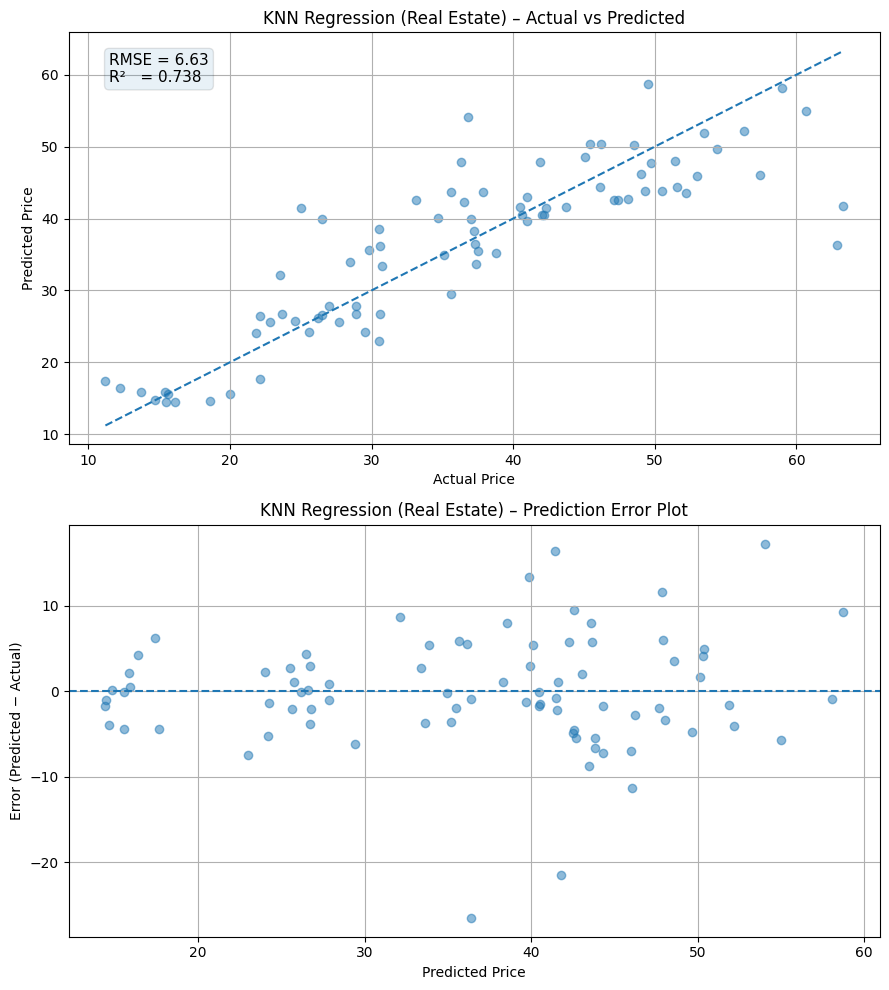

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def knn_regression_diagnostics(y_true, y_pred, title_prefix="KNN Regression"):
    # Ensure arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Prediction error
    error = y_pred - y_true

    fig, axes = plt.subplots(2, 1, figsize=(9, 10))

    # --- 1) Actual vs Predicted ---
    ax1 = axes[0]
    ax1.scatter(y_true, y_pred, alpha=0.5)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax1.plot([min_val, max_val], [min_val, max_val], linestyle="--")
    ax1.set_xlabel("Actual Price")
    ax1.set_ylabel("Predicted Price")
    ax1.set_title(f"{title_prefix} – Actual vs Predicted")
    ax1.grid(True)

    # Metrics box
    textstr = f"RMSE = {rmse:.2f}\nR²   = {r2:.3f}"
    ax1.text(
        0.05, 0.95, textstr,
        transform=ax1.transAxes,
        fontsize=11,
        verticalalignment="top",
        bbox=dict(boxstyle="round", alpha=0.1)
    )

    # --- 2) Prediction Error vs Predicted ---
    ax2 = axes[1]
    ax2.scatter(y_pred, error, alpha=0.5)
    ax2.axhline(0, linestyle="--")
    ax2.set_xlabel("Predicted Price")
    ax2.set_ylabel("Error (Predicted − Actual)")
    ax2.set_title(f"{title_prefix} – Prediction Error Plot")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Use it like this:
knn_regression_diagnostics(y_reg_test, y_reg_pred_knn, title_prefix="KNN Regression (Real Estate)")


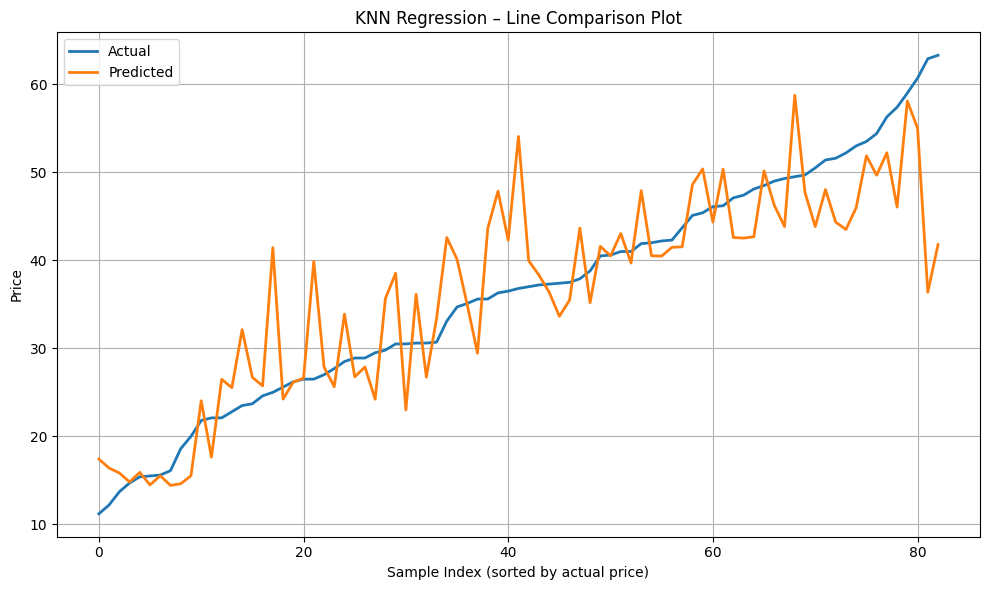

In [ ]:
import numpy as np

def plot_line_fit(y_true, y_pred):
    sorted_indices = np.argsort(y_true)
    y_true_sorted = y_true.iloc[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_true_sorted.values, label="Actual", linewidth=2)
    plt.plot(y_pred_sorted, label="Predicted", linewidth=2)
    plt.xlabel("Sample Index (sorted by actual price)")
    plt.ylabel("Price")
    plt.title("KNN Regression – Line Comparison Plot")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_line_fit(y_reg_test, y_reg_pred_knn)


##Final Conclusion

The KNN regression model captures the general upward trend in housing prices but struggles to produce smooth, stable predictions across the full range.

The sharp fluctuations in the prediction line indicate sensitivity to local noise and suggest that the model may be overfitting, especially with a lower number of neighbors.

While KNN can identify local patterns effectively, it does not generalize as well as linear regression or neural network models for this dataset.

Overall, KNN provides useful insights but is not the strongest model for continuous price prediction here, and tuning the value of k or selecting a more robust regression technique may yield better performance.